In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%load_ext google.colab.data_table

In [ ]:
# Ingest data
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions")
emission = tables[1]
emission.columns = ["country", "1990", "2005", "2017", "2017(%world)", "2017 vs 1990(%)", "2017(/land)", "2017(/capita)", "total 2018(incl)", "total 2018(excl)"]

# Filter countries
emission = emission.loc[3:, "country":"2017"]
emission

**Graph 1: CO2 of the bigger countries**

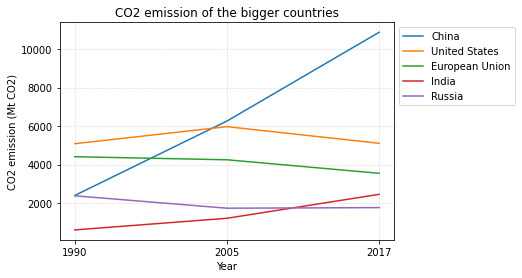

In [3]:
# Dataframe: five biggest countries
bigger_countries = emission.nlargest(5, "2017")

# Graph 1
years = bigger_countries.columns[1:4]

fig, ax = plt.subplots()
for index, row in bigger_countries.iterrows():
  ax.plot(years, row[1:4], label=row[0])

ax.set_title("CO2 emission of the bigger countries")
ax.set_xlabel("Year")
ax.set_ylabel("CO2 emission (Mt CO2)")
ax.legend(bbox_to_anchor=(1,1))
ax.grid(ls='--', c='gainsboro', lw=0.6)

plt.show()

**Graph 2: worst and best changers**

In [ ]:
# New columns: relative changes compared to 1990
emission["1990 (%)"] = 100
emission["2005 (%)"] = np.round(emission.loc[:, "2005"] / emission.loc[:, "1990"] * 100, 1)
emission["2017 (%)"] = np.round(emission.loc[:, "2017"] / emission.loc[:, "1990"] * 100, 1)

# Top 3 and bottom 3 countries
top_bottom = emission.sort_values(by=["2017 (%)"], ascending=False).iloc[np.r_[0:3,-3:-0]]
top_bottom

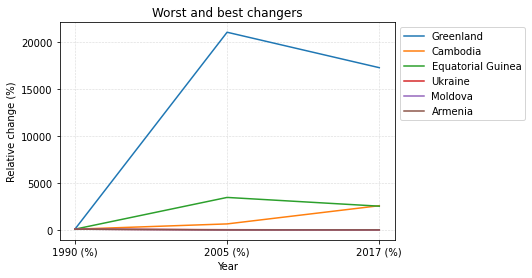

In [5]:
# Graph 2: version 1
years = top_bottom.columns[4:7]

fig, ax = plt.subplots()
for index, row in top_bottom.iterrows():
  ax.plot(years, row[4:7], label=row[0])

ax.set_title("Worst and best changers")
ax.set_xlabel("Year")
ax.set_ylabel("Relative change (%)")
ax.legend(bbox_to_anchor=(1,1))
ax.grid(ls='--', c='gainsboro', lw=0.6)

plt.show()

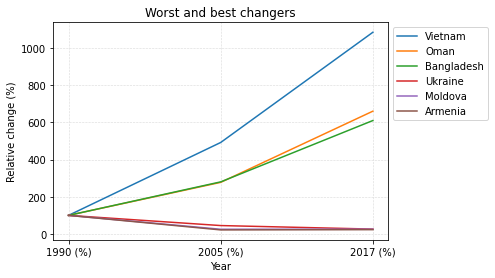

In [6]:
# Graph 2: version 2
new_top_bottom = emission.loc[emission["1990"]>5].sort_values(by=["2017 (%)"], ascending=False).iloc[np.r_[0:3,-3:-0]]

years = new_top_bottom.columns[4:7]

fig, ax = plt.subplots()
for index, row in new_top_bottom.iterrows():
  ax.plot(years, row[4:7], label=row[0])

ax.set_title("Worst and best changers")
ax.set_xlabel("Year")
ax.set_ylabel("Relative change (%)")
ax.legend(bbox_to_anchor=(1,1))
ax.grid(ls='--', c='gainsboro', lw=0.6)
# ax.set_yscale('log')  

plt.show()